# Plotting radials, quality control flags, and total vectors

In [1]:
from hfradarpy.radials import Radial, qc_radial_file
import glob
import os
import xarray as xr

In [2]:
# Path to radial directory
radial_dir = '/Users/mikesmith/Documents/github/rucool/hfradarpy/hfradarpy/data/radials/ruv/SEAB/'
save_dir = '/Users/mikesmith/Documents/github/rucool/hfradarpy/hfradarpy/data/radials_qc/ruv/SEAB/'

# Use glob to find radial files (*
files = sorted(glob.glob(os.path.join(radial_dir, '*.ruv')))
files[:10]

['/Users/mikesmith/Documents/github/rucool/hfradarpy/hfradarpy/data/radials/ruv/SEAB/RDLi_SEAB_2019_01_01_0200.ruv',
 '/Users/mikesmith/Documents/github/rucool/hfradarpy/hfradarpy/data/radials/ruv/SEAB/RDLi_SEAB_2019_01_01_0300.ruv',
 '/Users/mikesmith/Documents/github/rucool/hfradarpy/hfradarpy/data/radials/ruv/SEAB/RDLi_SEAB_2019_01_01_0400.ruv',
 '/Users/mikesmith/Documents/github/rucool/hfradarpy/hfradarpy/data/radials/ruv/SEAB/RDLi_SEAB_2019_01_01_0500.ruv',
 '/Users/mikesmith/Documents/github/rucool/hfradarpy/hfradarpy/data/radials/ruv/SEAB/RDLi_SEAB_2019_01_01_0600.ruv',
 '/Users/mikesmith/Documents/github/rucool/hfradarpy/hfradarpy/data/radials/ruv/SEAB/RDLi_SEAB_2019_01_01_0700.ruv',
 '/Users/mikesmith/Documents/github/rucool/hfradarpy/hfradarpy/data/radials/ruv/SEAB/RDLi_SEAB_2019_01_01_0800.ruv',
 '/Users/mikesmith/Documents/github/rucool/hfradarpy/hfradarpy/data/radials/ruv/SEAB/RDLi_SEAB_2019_01_01_0900.ruv',
 '/Users/mikesmith/Documents/github/rucool/hfradarpy/hfradarpy/d

In [3]:
r = Radial(files[1])
r

<Radial: RDLi_SEAB_2019_01_01_0300.ruv>

In [4]:
# run high frequency radar qartod tests on open radial file

qc_values = dict(
    qc_qartod_avg_radial_bearing=dict(reference_bearing=151, warning_threshold=15, failure_threshold=30),
    qc_qartod_radial_count=dict(radial_min_count=75.0, radial_low_count=225.0),
    qc_qartod_maximum_velocity=dict(radial_max_speed=300.0, radial_high_speed=100.0),
    qc_qartod_spatial_median=dict(radial_smed_range_cell_limit=2.1, radial_smed_angular_limit=10, radial_smed_current_difference=30),
    qc_qartod_temporal_gradient=dict(gradient_temp_fail=32, gradient_temp_warn=25),
    qc_qartod_primary_flag=dict(include=['qc_qartod_syntax', 'qc_qartod_valid_location', 'qc_qartod_radial_count',
                                         'qc_qartod_maximum_velocity', 'qc_qartod_spatial_median'])
)
r.initialize_qc()
r.qc_qartod_syntax()
r.qc_qartod_maximum_velocity(**qc_values['qc_qartod_maximum_velocity'])
r.qc_qartod_valid_location()
r.qc_qartod_radial_count(**qc_values['qc_qartod_radial_count'])
r.qc_qartod_spatial_median(**qc_values['qc_qartod_spatial_median'])
r.qc_qartod_temporal_gradient(files[1]) #pass the previous hourly radial to this one
r.qc_qartod_avg_radial_bearing(**qc_values['qc_qartod_avg_radial_bearing'])
r.qc_qartod_primary_flag(**qc_values['qc_qartod_primary_flag'])

/Users/mikesmith/miniconda3/envs/hfradarpy/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


In [20]:
tds = r.to_xarray('gridded', enhance=True).squeeze()
tds

<xarray.Dataset>
Dimensions:                    (bearing: 72, range: 21)
Coordinates:
  * bearing                    (bearing) int16 1 6 11 16 21 ... 341 346 351 356
  * range                      (range) float32 6.041 9.061 12.08 ... 63.43 66.45
    time                       datetime64[ns] 2019-01-01T03:00:00
    lon                        (range, bearing) float64 ...
    lat                        (range, bearing) float64 ...
Data variables: (12/22)
    u                          (range, bearing) float32 ...
    v                          (range, bearing) float32 ...
    vector_flag                (range, bearing) float32 ...
    spatial_quality            (range, bearing) float32 ...
    temporal_quality           (range, bearing) float32 ...
    velocity_max               (range, bearing) float32 ...
    ...                         ...
    valid_location_qc          (range, bearing) float32 ...
    radial_count_qc            (range, bearing) float32 ...
    spatial_median_filter_qc   (range, bearing) float32 ...
    temporal_gradient_qc       (range, bearing) float32 ...
    average_radial_bearing_qc  (range, bearing) float32 ...
    primary_flag_qc            (range, bearing) float32 ...
Attributes: (12/51)
    CTF:                           1.00
    FileType:                      LLUV rdls "RadialMap"
    LLUVSpec:                      1.27  2017 01 13
    UUID:                          F057FF72-B573-4FD5-9CDE-5D4FA0275FA4
    Manufacturer:                  CODAR Ocean Sensors. SeaSonde
    Site:                          SEAB ""
    ...                            ...
    PatternMethod:                 1 PatternVectors
    MergedCount:                   7
    ProcessedTimeStamp:            2019 01 01  03 40 17
    End:                           
    ProcessingTool:                ['"RadialMerger" 11.5.0', '"SpectraToRadia...
    QCTest:                        ['qc_qartod_syntax (QC06) - Test applies t...

In [21]:
tds.to_netcdf('/Users/mikesmith/Documents/RDLi_2019_01_01_0300.ruv.nc')

ValueError: unsupported dtype for netCDF4 variable: datetime64[ns]

In [6]:
# Lets get rid of the single time dimension. It will cause problems during plotting
tds = tds.squeeze()

In [7]:
# Import matplotlib and cartopy
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [8]:
# Adjust some standard plotting settings to make them the size of a sheet of paper
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

# Set colors of the land. 
edgecolor = 'black'
landcolor = 'tan'

LAND = cfeature.NaturalEarthFeature(
    'physical', 'land', '10m',
    edgecolor='face',
    facecolor='tan'
)

state_lines = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none'
)

In [9]:
extent = [tds.lon.min(), tds.lon.max(), tds.lat.min(), tds.lat.max()]

In [12]:
# Create a re-usable function for map features that we can pass an axes to.
def map_features(ax):
    # Axes properties and features
    ax.set_extent(extent)
    ax.add_feature(LAND, edgecolor=edgecolor, facecolor=landcolor)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(cfeature.LAKES)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(state_lines, zorder=11, edgecolor=edgecolor)

    # Gridlines and grid labels
    gl = ax.gridlines(
        draw_labels=True,
        linewidth=.5,
        color='black',
        alpha=0.25,
        linestyle='--'
    )

    gl.top_labels = gl.right_labels = False
    gl.xlabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size': 10, 'color': 'black'}
    gl.xlocator = mticker.MaxNLocator(integer=True)
    gl.ylocator = mticker.MaxNLocator(integer=True)
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    ax.tick_params(which='major',
                   direction='out',
                   bottom=True, top=True,
                   labelbottom=True, labeltop=False,
                   left=True, right=True,
                   labelleft=True, labelright=False,
                   length=5, width=2)

    ax.tick_params(which='minor',
                   direction='out',
                   bottom=True, top=True,
                   labelbottom=True, labeltop=False,
                   left=True, right=True,
                   labelleft=True, labelright=False,
                   width=1)

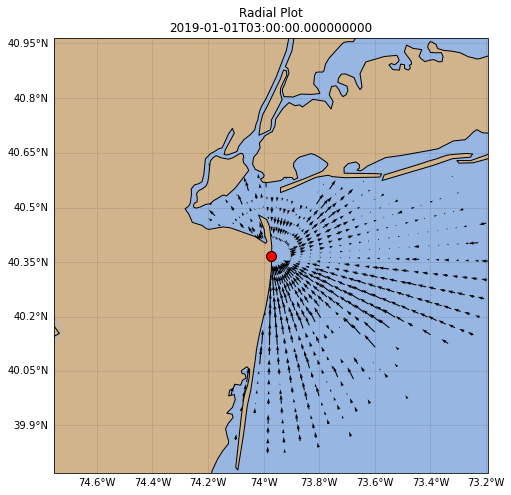

In [13]:
# Intialize an empty subplot using cartopy
fig, ax = plt.subplots(
    figsize=(11, 8),
    subplot_kw=dict(projection=ccrs.Mercator())
)

plt.title(f'Radial Plot\n{tds.time.data}')
plt.quiver(tds.lon.data, tds.lat.data, tds.u.data, tds.v.data, transform=ccrs.PlateCarree())

# Get the receiver location for plotting purposes
receiver_location = [float(x) for x in tds.Origin.split('  ')]
receiver_location.reverse()
receiver_location

plt.plot(receiver_location[0], receiver_location[1], 'o', markersize=10, markeredgecolor='black', color='red', transform=ccrs.PlateCarree())

map_features(ax)


# Split out everything into seperate variables in order to pass them easier to the plotting functions

In [14]:
import numpy.ma as ma

time = tds.time
lon = tds.coords['lon'].data
lat = tds.coords['lat'].data
u = tds['u'].data
v = tds['v'].data

u = ma.masked_invalid(u)
v = ma.masked_invalid(v)

In [15]:
from oceans.ocfis import uv2spdir, spdir2uv

angle, speed = uv2spdir(u, v)  # convert u/v to angle and speed

u, v = spdir2uv(  # convert angle and speed back to u/v, normalizing the arrow sizes
    np.ones_like(speed),
    angle,
    deg=True
)

ModuleNotFoundError: No module named 'oceans'

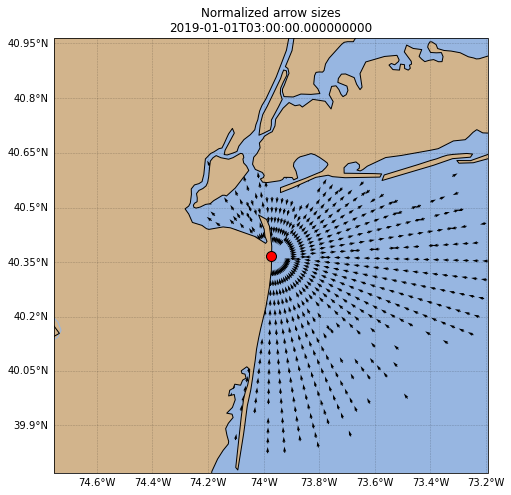

In [14]:
# Intialize an empty subplot using cartopy
fig, ax = plt.subplots(
    figsize=(11, 8),
    subplot_kw=dict(projection=ccrs.Mercator())
)

plt.title(f'Normalized arrow sizes\n{tds.time.data}')
plt.quiver(lon, lat, u, v, transform=ccrs.PlateCarree())
plt.plot(receiver_location[0], receiver_location[1], 'o', markersize=10, markeredgecolor='black', color='red', transform=ccrs.PlateCarree())

map_features(ax)

In [15]:
import cmocean
from matplotlib.colors import TwoSlopeNorm, Normalize

"""
Displays the direction and magnitude of the radials
"""
cmap = cmocean.cm.balance
scale=50
headwidth=2.5
headlength=4
headaxislength=4
sub=1
velocity_min = -40
velocity_max = 40
cbar_step = 10
offset = Normalize(vmin=velocity_min, vmax=velocity_max, clip=True)

In [16]:
# Define arrow colors. Limited by velocity_min and velocity_max
color_clipped = np.clip(
    tds.velocity.data[::sub],
    velocity_min,
    velocity_max
).squeeze()

ticks = np.append(np.arange(velocity_min, velocity_max, cbar_step), velocity_max)

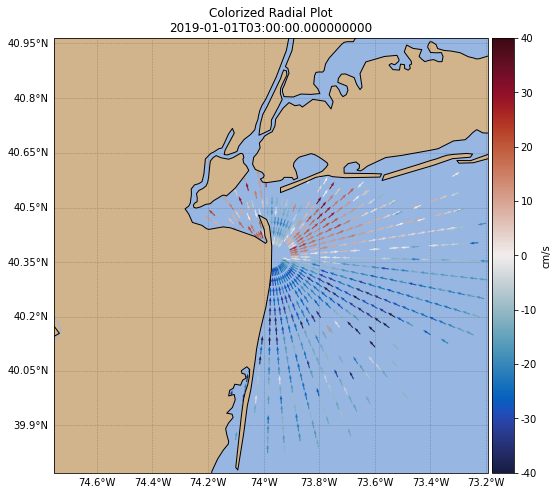

In [17]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(
        figsize=(11, 8),
        subplot_kw=dict(projection=ccrs.Mercator())
    )

# Plot title
plt.title(f'Colorized Radial Plot\n{tds.time.data}')

qargs = dict(cmap=cmap, scale=scale, headwidth=headwidth, headlength=headlength, headaxislength=headaxislength)
qargs['transform'] = ccrs.PlateCarree()
qargs['norm'] = offset

# plot arrows over pcolor
h = ax.quiver(
    lon[::sub],
    lat[::sub],
    u[::sub],
    v[::sub],
    color_clipped,
    **qargs
)
map_features(ax)

# generate colorbar
divider = make_axes_locatable(ax)
cax = divider.new_horizontal(size='5%', pad=0.05, axes_class=plt.Axes)
fig.add_axes(cax)

cb = plt.colorbar(h, cax=cax, ticks=ticks)
cb.ax.set_yticklabels([f'{s:d}' for s in ticks])
cb.set_label('cm/s')

In [18]:
from matplotlib import colors

"""
Motion displays the direction (towards or away) from radar
"""
title = 'Radial Map: Towards/Away from radar'
cmap= 'bwr'

velocity = tds.velocity
velocity_temp = velocity.where(velocity > 0, other=-1)  # Going away from radar
color_clipped = velocity_temp.where(velocity < 0, other=1).data  # Going towards radar
offset = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)

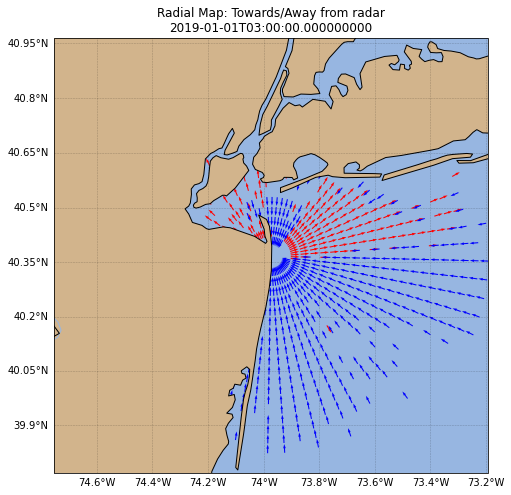

In [19]:
fig, ax = plt.subplots(
        figsize=(11, 8),
        subplot_kw=dict(projection=ccrs.Mercator())
    )

# Plot title
plt.title(f'{title}\n{tds.time.data}')

qargs = dict(cmap=cmap, scale=scale, headwidth=headwidth, headlength=headlength, headaxislength=headaxislength)
qargs['transform'] = ccrs.PlateCarree()
qargs['norm'] = offset

# plot arrows over pcolor
h = ax.quiver(
    lon[::sub],
    lat[::sub],
    u[::sub],
    v[::sub],
    color_clipped,
    **qargs
)
map_features(ax)


In [20]:
color_clipped = tds.primary_flag_qc.where(tds.primary_flag_qc == 1, other=-1).data  # PRIM == 1 where vectors pass qc
offset = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
title = "Radial Map: QC Pass/Fail"
cmap = colors.ListedColormap(['red', 'limegreen'])

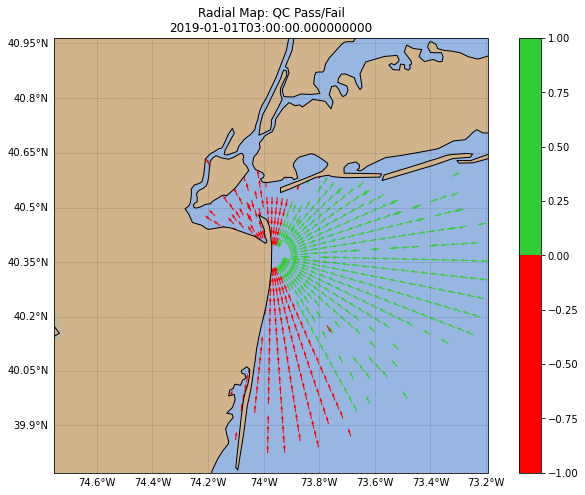

In [21]:
fig, ax = plt.subplots(
        figsize=(11, 8),
        subplot_kw=dict(projection=ccrs.Mercator())
    )

# Plot title
plt.title(f'{title}\n{tds.time.data}')


qargs = dict(cmap=cmap, scale=scale, headwidth=headwidth, headlength=headlength, headaxislength=headaxislength)
qargs['transform'] = ccrs.PlateCarree()
qargs['norm'] = offset

# plot arrows over pcolor
h = ax.quiver(
    lon[::sub],
    lat[::sub],
    u[::sub],
    v[::sub],
    color_clipped,
    **qargs
)
map_features(ax)
plt.colorbar(h)


# Plot the totals

In [22]:
file = '/Users/mikesmith/Downloads/realtime_maracoos_6km_totals_qartod_0b87_0831_aef4.nc'

ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:              (time: 166, depth: 1, latitude: 187, longitude: 196)
Coordinates:
  * time                 (time) datetime64[ns] 2022-02-21 ... 2022-02-27T21:0...
  * depth                (depth) float32 0.0
  * latitude             (latitude) float32 33.82 33.87 33.93 ... 43.8 43.85
  * longitude            (longitude) float32 -77.91 -77.85 ... -66.64 -66.58
Data variables: (12/13)
    u                    (time, depth, latitude, longitude) float32 ...
    v                    (time, depth, latitude, longitude) float32 ...
    u_err                (time, depth, latitude, longitude) float32 ...
    v_err                (time, depth, latitude, longitude) float32 ...
    total_errors         (time, depth, latitude, longitude) float32 ...
    uv_covariance        (time, depth, latitude, longitude) float32 ...
    ...                   ...
    qc303_maxspeed       (time, depth, latitude, longitude) float32 ...
    qc305_validlocation  (time, depth, latitude, longitude) float32 ...
    qc306_uerr           (time, depth, latitude, longitude) float32 ...
    qc307_verr           (time, depth, latitude, longitude) float32 ...
    qc_primary_flag      (time, depth, latitude, longitude) float32 ...
    qc_operator_flag     (time, depth, latitude, longitude) float32 ...
Attributes: (12/58)
    acknowledgement:               This data is provided by the Mid-Atlantic ...
    cdm_data_type:                 Grid
    comment:                       Network maintained by MARACOOS. For oi_* g...
    contributor_name:              Scott Glenn, Josh Kohut, Hugh Roarty, Etha...
    contributor_role:              Principal Investigator, Principal Investig...
    Conventions:                   CF-1.6, ACDD-1.3, COARDS
    ...                            ...
    summary:                       Optimally Interpolated Total Vectors calcu...
    testOutOfDate:                 now-1day
    time_coverage_end:             2022-02-27T21:00:00Z
    time_coverage_start:           2022-02-21T00:00:00Z
    title:                         Surface Currents - MARACOOS - 5MHz - Realt...
    Westernmost_Easting:           -77.90598

In [26]:
ds = ds.mean('time')
ds

lon = ds.longitude.data
lat = ds.latitude.data
u = ds.u.data
v = ds.v.data
lon.shape, lat.shape, u.shape, v.shape

((196,), (187,), (1, 187, 196), (1, 187, 196))

In [30]:
lons, lats = np.meshgrid(lon, lat)
lons.shape, lats.shape, u.shape, v.shape

((187, 196), (187, 196), (1, 187, 196), (1, 187, 196))

In [32]:
from oceans.ocfis import uv2spdir, spdir2uv

angle, speed = uv2spdir(u.squeeze(), v.squeeze())  # convert u/v to angle and speed
u, v = spdir2uv(  # convert angle and speed back to u/v, normalizing the arrow sizes
    np.ones_like(speed),
    angle,
    deg=True
)

In [38]:
np.nanmin(speed), np.nanmax(speed)

(0.0003244059, 1.5920553)

In [46]:
extent = [-76.2, -69, 33.5, 42]

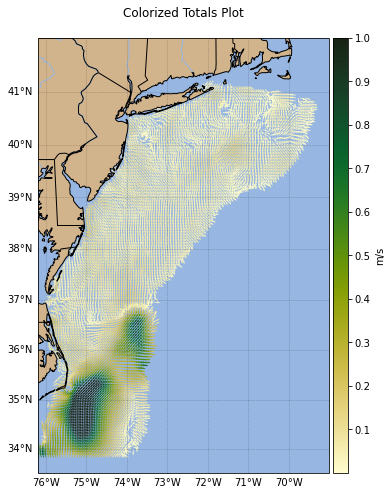

In [47]:
import cmocean

qwargs = dict(
    cmap=cmocean.cm.speed,
    transform=ccrs.PlateCarree(),
    scale=65, # Number of data units per arrow length unit, e.g., m/s per plot width; a smaller scale parameter makes the arrow longer. Default is None.
    headwidth=2.75, # Head width as multiple of shaft width.
    headlength=2.75, #Head length as multiple of shaft width.
    headaxislength=2.5, # Head length at shaft intersection.
    minshaft=1,
    minlength=1
)

# Clip the colors 
color_clipped = np.clip(speed, 0, 1).squeeze()

# Set the colorbar ticks to correspond to the velocity minimum and maximum of the data with a step of 20... Append the max velocity 
ticks = np.append(np.arange(0, 1, .1), 1)

fig, ax = plt.subplots(
        figsize=(11, 8),
        subplot_kw=dict(projection=ccrs.Mercator())
    )

# Plot title
plt.title(f'Colorized Totals Plot\n')

# plot arrows over pcolor
h = ax.quiver(
    lons,
    lats,
    u,
    v,
    color_clipped,
    **qargs
)
map_features(ax)
ax.set_extent(extent)

# generate colorbar
divider = make_axes_locatable(ax)
cax = divider.new_horizontal(size='5%', pad=0.05, axes_class=plt.Axes)
fig.add_axes(cax)

cb = plt.colorbar(h, cax=cax, ticks=ticks)
# cb.ax.set_yticklabels([f'{s:d}' for s in ticks])
cb.set_label('m/s')